# Bike sharing system demand model


#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. Company's plan is to increase the revenue by predicting the demand for bikes after this ongoing quarantine situation ends across the nation due to Covid-19.

Essentially, the company wants —

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands
- Prepare a model to identify the variables that affects the demand

## Step 1: Reading and Understanding the Data



In [453]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [454]:
# Importing libraries

import numpy as np
import pandas as pd

In [455]:
bike_df = pd.read_csv("bike-sharing.csv")

In [456]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [457]:
bike_df.shape

(730, 16)

In [458]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [459]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Visualising the Data



In [460]:
#Importing libraries

import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables


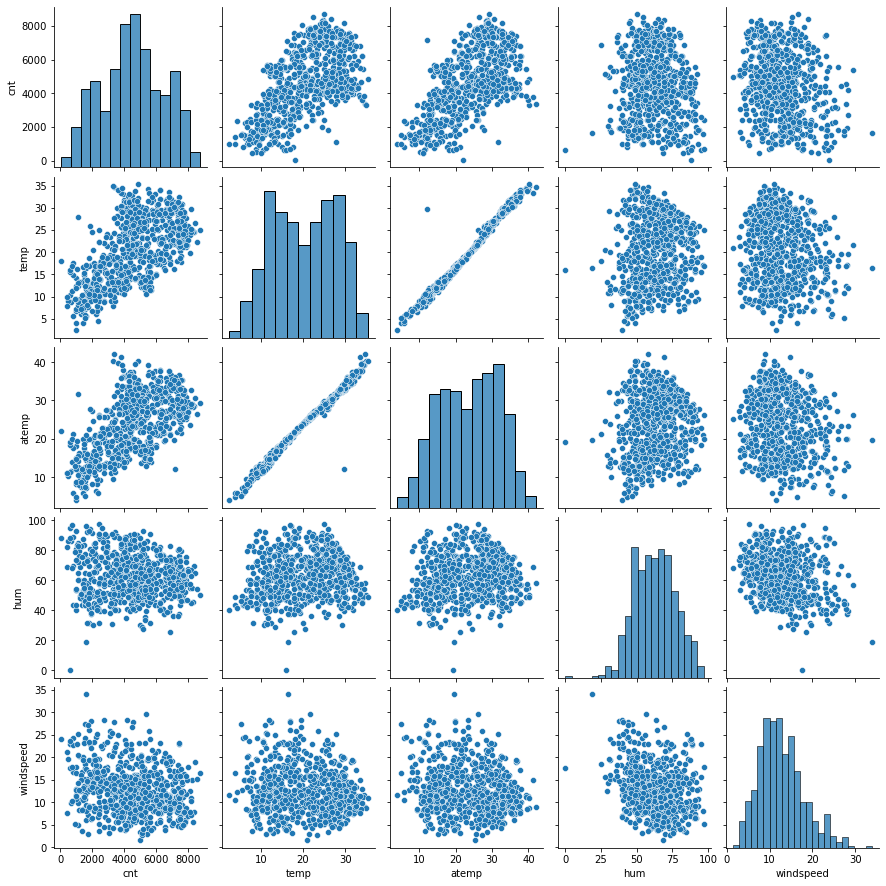

In [461]:
sns.pairplot(bike_df[['cnt','temp','atemp','hum','windspeed']])
plt.show()

#### Visualising Categorical Variables



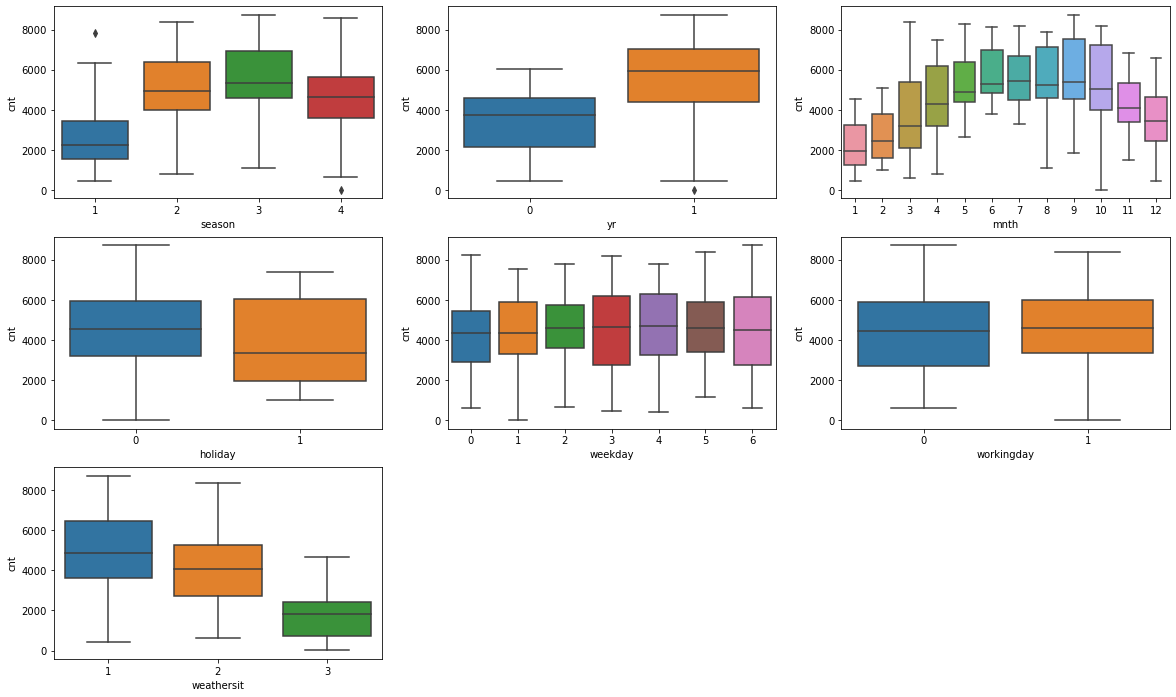

In [462]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.show()

## Step 3: Data Preparation

In [463]:
# Dropping off 'instant','dteday','registered','casual' columns since these variables don't provide value
bike_df = bike_df.drop(['instant', 'dteday','registered','casual'], axis = 1)

In [464]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [465]:
# Mapping season values
season_map = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
bike_df['season'] = bike_df['season'].map(season_map)

In [466]:
month_map = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
bike_df['mnth'] = bike_df['mnth'].map(month_map)

In [467]:
weekday_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
bike_df['weekday'] = bike_df['weekday'].map(weekday_map)

In [468]:
weathersit_map = {1:'Clear',2:'Cloudy',3:'LightRain',4:'HeavyRain'}
bike_df['weathersit'] = bike_df['weathersit'].map(weathersit_map)

In [469]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Sunday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Monday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Tuesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Wednesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Thursday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Dummy Variables

Creating dummy variables for different variables

In [470]:
# dummy variables for the feature 'season'
season_dummies = pd.get_dummies(bike_df['season'])

In [471]:
season_dummies.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


- `000` - `fall`
- `100` - `spring`
- `010` - `summer`
- `001` - `winter`

In [472]:
# Dropping off first column in dummies
season_dummies = pd.get_dummies(bike_df['season'], drop_first = True)

In [473]:
# Adding the results to bike sharing dataframe

bike_df = pd.concat([bike_df, season_dummies], axis = 1)

In [474]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,January,0,Sunday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,January,0,Monday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,January,0,Tuesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,January,0,Wednesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,January,0,Thursday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [475]:
# Dropping 'Season' as we have created the dummies for it

bike_df.drop(['season'], axis = 1, inplace = True)

In [476]:
bike_df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,January,0,Sunday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,January,0,Monday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,January,0,Tuesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,January,0,Wednesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,January,0,Thursday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [477]:
# dummy variables for the feature 'mnth'
mnth_dummies = pd.get_dummies(bike_df['mnth'])

In [478]:
mnth_dummies.head()

,April,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [479]:
# dropping first column 'April'
mnth_dummies = pd.get_dummies(bike_df['mnth'], drop_first = True)

In [480]:
# Adding the results to bike sharing dataframe

bike_df = pd.concat([bike_df, mnth_dummies], axis = 1)

In [481]:
bike_df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September
0,0,January,0,Sunday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,January,0,Monday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,January,0,Tuesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,January,0,Wednesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,January,0,Thursday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [482]:
# Dropping 'mnth' as we have created the dummies for it

bike_df.drop(['mnth'], axis = 1, inplace = True)

In [483]:
pd.set_option('display.max_columns', None)

In [484]:
bike_df.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September
0,0,0,Sunday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,Monday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,Tuesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,Wednesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,Thursday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [485]:
# dummy variables for the feature 'weekday'
weekday_dummies = pd.get_dummies(bike_df['weekday'])

In [486]:
weekday_dummies.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0


In [487]:
# Removing first column 'Friday'
weekday_dummies = pd.get_dummies(bike_df['weekday'], drop_first = True)

In [488]:
# Adding the results to bike sharing dataframe

bike_df = pd.concat([bike_df, weekday_dummies], axis = 1)

In [489]:
bike_df.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,Sunday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,Monday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,Tuesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,Wednesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,Thursday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [490]:
# Dropping 'weekday' as we have created the dummies for it

bike_df.drop(['weekday'], axis = 1, inplace = True)

In [491]:
bike_df.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [492]:
# dummy variables for the feature 'weathersit'
weathersit_dummies = pd.get_dummies(bike_df['weathersit'])

In [493]:
weathersit_dummies.head()

,Clear,Cloudy,LightRain
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [494]:
# Removing first column 'Clear'
weathersit_dummies = pd.get_dummies(bike_df['weathersit'], drop_first = True)

In [495]:
# Adding the results to bike sharing dataframe

bike_df = pd.concat([bike_df, weathersit_dummies], axis = 1)

In [496]:
bike_df.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,LightRain
0,0,0,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,0,0,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [497]:
# Dropping 'weathersit' as we have created the dummies for it

bike_df.drop(['weathersit'], axis = 1, inplace = True)

In [498]:
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,LightRain
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets



In [499]:
from sklearn.model_selection import train_test_split


np.random.seed(0)
bike_df_train, bike_df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

Since a few variables aren't in comparable scale, so rescaling using MinMax scaling

In [500]:
from sklearn.preprocessing import MinMaxScaler

In [501]:
scaler = MinMaxScaler()

In [502]:
# Applying scaler() to all the columns except the 'yes or no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

bike_df_train[num_vars] = scaler.fit_transform(bike_df_train[num_vars])

In [503]:
bike_df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,LightRain
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [504]:
bike_df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,LightRain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


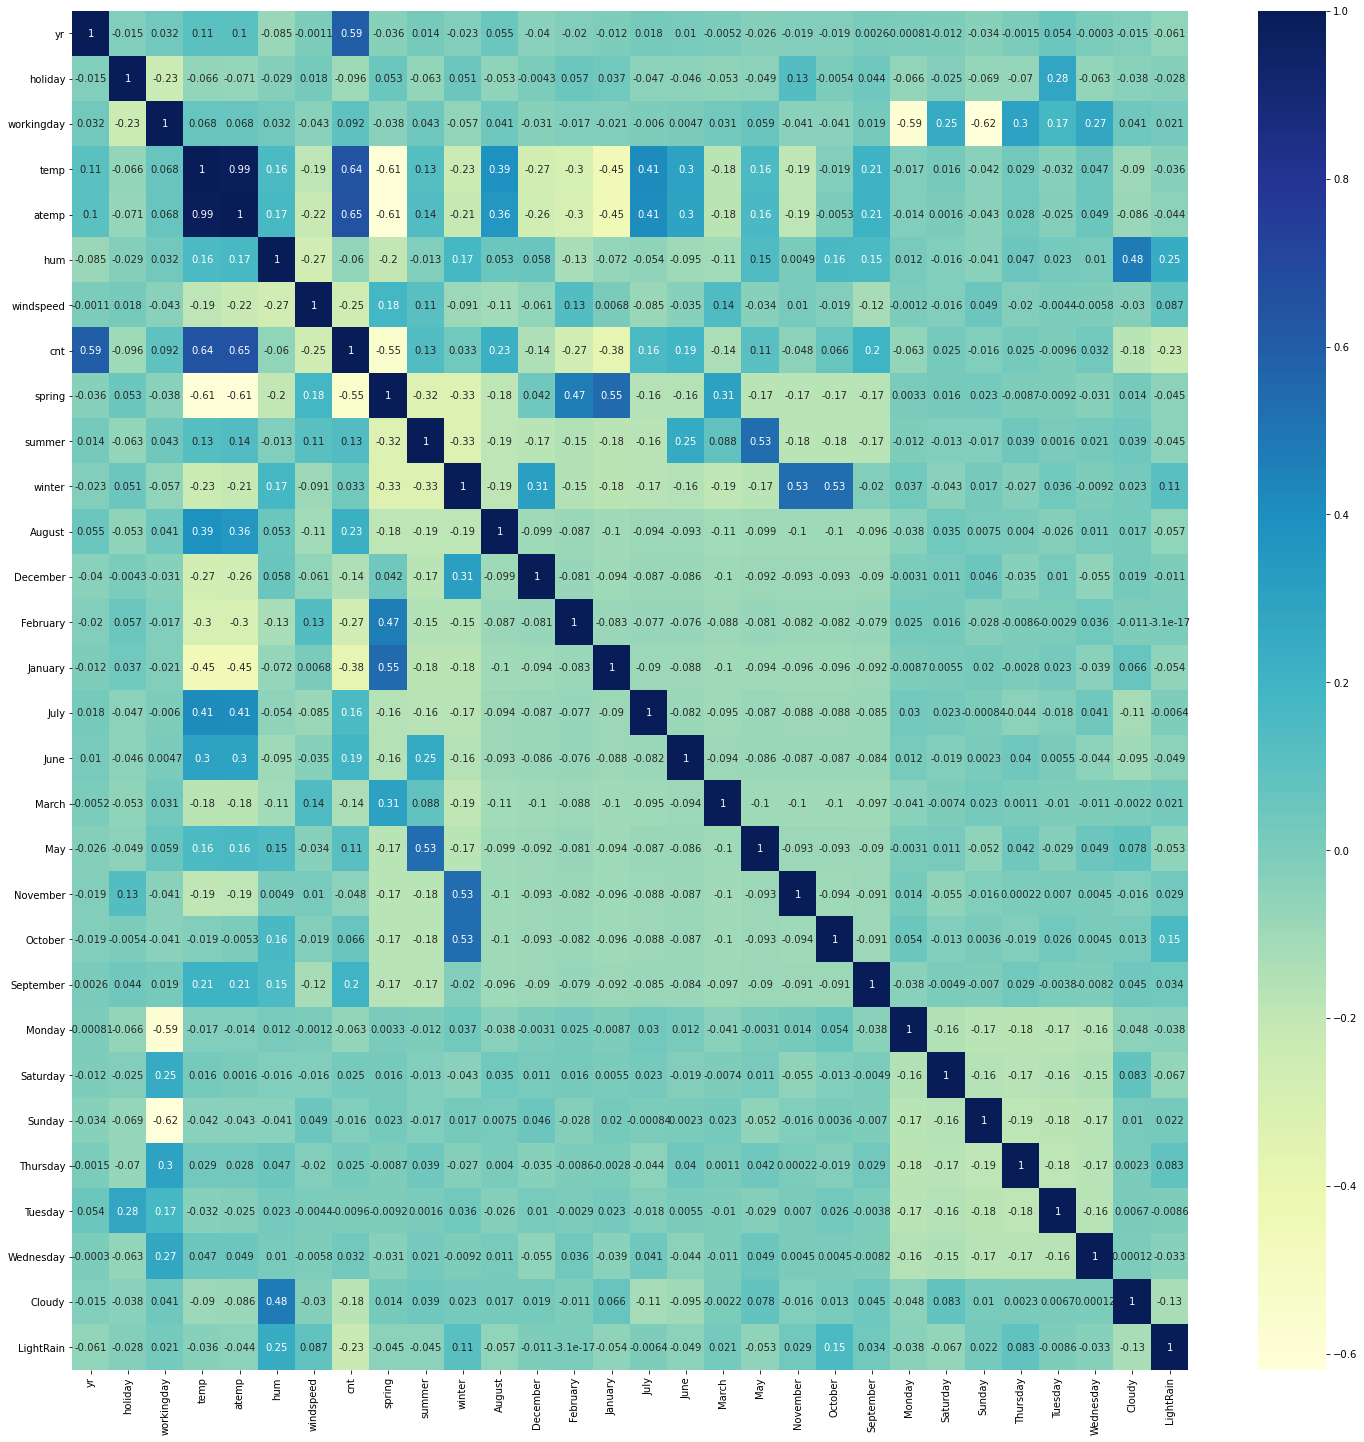

In [505]:
# checking correlation

plt.figure(figsize = (25, 25))
sns.heatmap(bike_df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [506]:
y_train = bike_df_train.pop('cnt')
X_train = bike_df_train

In [507]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [508]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,LightRain
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


## Step 5: Building a linear model


### Adding all the variables to the model

In [509]:
# Getting all the columns of the dataframe

bike_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Cloudy', 'LightRain'],
      dtype='object')

In [510]:
#Building a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()


In [511]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          8.42e-181
Time:                        23:03:22   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2413      0.035      6.826      0.0

### Checking VIF


In [512]:
# Checking for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [513]:
# Creating a dataframe with feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,86.46
3,temp,67.12
4,atemp,56.09
23,Sunday,19.72
21,Monday,18.35
7,spring,10.80
9,winter,9.52
8,summer,8.31
18,November,6.80
19,October,6.59


### Dropping the variable and updating the model

From the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `March` as it has a very high p-value of `0.958`. So dropping off variable

In [514]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('March', 1,)

In [515]:
# Building a model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [516]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.9
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          8.19e-182
Time:                        23:04:01   Log-Likelihood:                 528.02
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     482   BIC:                            -881.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2420      0.033      7.331      0.0

In [517]:
# Calculating the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,74.84
3,temp,67.07
4,atemp,56.05
22,Sunday,17.22
20,Monday,16.19
7,spring,9.70
9,winter,9.19
8,summer,8.01
10,August,5.81
14,July,5.18


### Dropping the Variable and Updating the Model

From the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `June` as it has a very high p-value of `0.929`. So dropping off variable

In [518]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('June', 1)

In [519]:
# Building a model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [520]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          7.82e-183
Time:                        23:04:12   Log-Likelihood:                 528.02
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     483   BIC:                            -887.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2418      0.033      7.358      0.0

In [521]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,74.29
3,temp,61.12
4,atemp,55.03
21,Sunday,17.04
19,Monday,16.03
9,winter,8.90
7,spring,8.77
8,summer,7.51
16,November,4.77
17,October,4.52


### Dropping the variable and updating the model

From the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `holiday` as it has a very high p-value of `0.830`. So dropping off variable

In [522]:
X = X.drop('holiday', 1)

In [523]:
# Building a model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [524]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          7.82e-183
Time:                        23:04:32   Log-Likelihood:                 528.02
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     483   BIC:                            -887.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2468      0.050      4.976      0.0

In [525]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,394.62
3,atemp,376.25
4,hum,38.08
1,workingday,21.28
8,winter,11.06
6,spring,8.50
7,summer,7.40
20,Sunday,6.13
18,Monday,5.80
5,windspeed,5.46


### Dropping the variable and updating the model

From the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `October` as it has a very high p-value of `0.803`. So dropping off variable

In [526]:
X = X.drop('October', 1)

In [527]:
# Building a model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [528]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     112.6
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          7.52e-184
Time:                        23:04:49   Log-Likelihood:                 527.99
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     484   BIC:                            -893.9
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2492      0.049      5.124      0.0

In [529]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,394.34
3,atemp,375.89
4,hum,36.63
1,workingday,21.28
6,spring,8.48
8,winter,6.86
7,summer,6.77
19,Sunday,6.13
17,Monday,5.79
5,windspeed,5.38


### Dropping the variable and updating the model

From the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `atemp` as it has a very high p-value of `0.696` and a high VIF value of `375.89`. So dropping off variable

In [530]:
X = X.drop('atemp', 1)

In [532]:
# Building a model
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [533]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     117.5
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          7.40e-185
Time:                        23:05:19   Log-Likelihood:                 527.91
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     485   BIC:                            -900.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2487      0.049      5.119      0.0

In [534]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,36.56
2,temp,24.37
1,workingday,21.23
5,spring,8.44
7,winter,6.80
6,summer,6.72
18,Sunday,6.12
16,Monday,5.79
4,windspeed,5.13
8,August,3.27


### Dropping the variable and updating the model

From the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `Thursday` as it has a very high p-value of `0.797`. So dropping off variable

In [535]:
X = X.drop('Thursday', 1)

In [536]:
# Building a model
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

In [537]:
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.9
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          6.82e-186
Time:                        23:05:36   Log-Likelihood:                 527.87
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     486   BIC:                            -906.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2500      0.048      5.184      0.0

In [538]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,36.38
2,temp,24.20
1,workingday,20.88
5,spring,8.38
7,winter,6.75
6,summer,6.67
18,Sunday,5.88
16,Monday,5.55
4,windspeed,5.13
8,August,3.27


### Dropping the variable and updating the model

From the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `Saturday` as it has a very high p-value of `0.588`. So dropping off variable

In [539]:
X = X.drop('Saturday', 1)

In [540]:
# Building a model
X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

In [541]:
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     128.6
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          6.87e-187
Time:                        23:05:51   Log-Likelihood:                 527.72
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     487   BIC:                            -912.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2531      0.048      5.286      0.0

In [542]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,36.38
2,temp,24.15
1,workingday,20.80
5,spring,8.36
7,winter,6.71
6,summer,6.65
17,Sunday,5.81
16,Monday,5.49
4,windspeed,5.12
8,August,3.26


### Dropping the variable and updating the model

From the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `August` as it has a very high p-value of `0.588`. So dropping off variable

In [543]:
X = X.drop('August', 1)

In [544]:
# Building a model
X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()

In [545]:
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     134.9
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          7.12e-188
Time:                        23:06:24   Log-Likelihood:                 527.51
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     488   BIC:                            -917.9
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2611      0.046      5.658      0.0

In [546]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,35.53
2,temp,22.61
1,workingday,19.86
5,spring,6.09
16,Sunday,5.52
15,Monday,5.30
4,windspeed,5.09
7,winter,4.45
6,summer,3.75
10,January,2.43


### Dropping the variable and updating the model

From the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `Wednesday` as it has a very high p-value of `0.267`. So dropping off variable

In [547]:
X = X.drop('Wednesday', 1)

In [548]:
# Building a model
X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()

In [549]:
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     141.5
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.09e-188
Time:                        23:06:32   Log-Likelihood:                 526.86
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     489   BIC:                            -922.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2595      0.046      5.625      0.0

In [550]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,35.43
2,temp,22.61
1,workingday,19.79
5,spring,6.09
16,Sunday,5.49
15,Monday,5.26
4,windspeed,5.09
7,winter,4.44
6,summer,3.75
10,January,2.43


### Dropping the variable and updating the model

From the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `Tuesday` as it has a very high p-value of `0.275`. So dropping off variable

In [551]:
X = X.drop('Tuesday', 1)

In [552]:
# Building a model
X_train_lm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm).fit()

In [553]:
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     148.8
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.59e-189
Time:                        23:06:41   Log-Likelihood:                 526.24
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     490   BIC:                            -927.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2494      0.045      5.516      0.0

In [554]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,34.79
2,temp,22.48
1,workingday,19.10
5,spring,6.06
16,Sunday,5.11
4,windspeed,5.06
15,Monday,4.89
7,winter,4.40
6,summer,3.71
10,January,2.42


### Dropping the variable and updating the model

From the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `May` as it has a very high p-value of `0.148`. So dropping off variable

In [555]:
X = X.drop('May', 1)

In [556]:
# Building a model
X_train_lm = sm.add_constant(X)

lr_12 = sm.OLS(y_train, X_train_lm).fit()

In [557]:
print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.6
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          3.55e-190
Time:                        23:06:48   Log-Likelihood:                 525.15
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     491   BIC:                            -931.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2374      0.044      5.335      0.0

In [558]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,34.69
2,temp,22.29
1,workingday,18.92
5,spring,6.05
15,Sunday,5.04
4,windspeed,4.99
14,Monday,4.85
7,winter,4.40
6,summer,3.09
10,January,2.42


### Dropping the variable and updating the model

From the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `February` as it has a very high p-value of `0.112`. So dropping off variable

In [559]:
X = X.drop('February', 1)

In [560]:
# Building a model
X_train_lm = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_lm).fit()

In [561]:
print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          9.55e-191
Time:                        23:06:56   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     492   BIC:                            -935.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2239      0.044      5.118      0.0

In [562]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,34.24
2,temp,21.56
1,workingday,18.83
5,spring,5.06
14,Sunday,5.03
4,windspeed,4.98
13,Monday,4.83
7,winter,4.40
6,summer,3.08
15,Cloudy,2.34


### Dropping the variable and updating the model

From the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `hum` as it has a very high VIF-value of `34.24`. So dropping off variable

In [563]:
X = X.drop('hum', 1)

In [564]:
# Building a model
X_train_lm = sm.add_constant(X)

lr_14 = sm.OLS(y_train, X_train_lm).fit()

In [565]:
print(lr_14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.5
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.49e-188
Time:                        23:07:05   Log-Likelihood:                 515.89
No. Observations:                 510   AIC:                            -997.8
Df Residuals:                     493   BIC:                            -925.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1556      0.041      3.817      0.0

In [566]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,17.17
2,temp,13.61
3,windspeed,4.85
13,Sunday,4.70
12,Monday,4.39
4,spring,4.24
6,winter,3.70
5,summer,2.76
0,yr,2.08
10,November,1.78


### Dropping the variable and updating the model

From the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `Monday` as it has a very high p-value of `0.068`. So dropping off variable

In [567]:
X = X.drop('Monday', 1)

In [568]:
# Building a model
X_train_lm = sm.add_constant(X)

lr_15 = sm.OLS(y_train, X_train_lm).fit()

In [569]:
print(lr_15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.7
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          5.71e-189
Time:                        23:07:12   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -996.3
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1999      0.033      6.084      0.0

In [570]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.92
1,workingday,4.73
3,windspeed,4.71
4,spring,3.09
6,winter,3.02
5,summer,2.32
0,yr,2.08
12,Sunday,1.86
10,November,1.78
8,January,1.67


### Dropping the variable and updating the model

From the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `summer` as it has a very high p-value of `0.027`. So dropping off variable

In [571]:
X = X.drop('summer', 1)

In [572]:
# Building a model
X_train_lm = sm.add_constant(X)

lr_16 = sm.OLS(y_train, X_train_lm).fit()

In [573]:
print(lr_16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.7
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          4.64e-189
Time:                        23:07:17   Log-Likelihood:                 511.64
No. Observations:                 510   AIC:                            -993.3
Df Residuals:                     495   BIC:                            -929.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2436      0.026      9.221      0.0

In [574]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.72
1,workingday,4.56
3,windspeed,4.17
5,winter,2.56
4,spring,2.45
0,yr,2.07
11,Sunday,1.82
9,November,1.77
7,January,1.67
12,Cloudy,1.55


### Dropping the variable and updating the model

From the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `temp` as it has a very high VIF-value of `6.72`. So dropping off variable

In [575]:
X = X.drop('temp', 1)

In [576]:
# Building a model
X_train_lm = sm.add_constant(X)

lr_17 = sm.OLS(y_train, X_train_lm).fit()

In [577]:
print(lr_17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     147.4
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          6.61e-161
Time:                        23:07:20   Log-Likelihood:                 441.88
No. Observations:                 510   AIC:                            -855.8
Df Residuals:                     496   BIC:                            -796.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5177      0.017     30.809      0.0

In [578]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.51
1,workingday,3.19
4,winter,2.56
3,spring,2.31
0,yr,1.88
8,November,1.76
6,January,1.64
10,Sunday,1.55
11,Cloudy,1.54
5,December,1.46


### Dropping the variable and updating the model

From the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `winter` as it has a very high p-value of `0.469`. So dropping off variable

In [579]:
X = X.drop('winter', 1)

In [580]:
# Building a model
X_train_lm = sm.add_constant(X)

lr_18 = sm.OLS(y_train, X_train_lm).fit()

In [581]:
print(lr_18.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     159.8
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          6.64e-162
Time:                        23:07:24   Log-Likelihood:                 441.61
No. Observations:                 510   AIC:                            -857.2
Df Residuals:                     497   BIC:                            -802.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5207      0.016     31.973      0.0

In [582]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.48
1,workingday,3.14
3,spring,2.11
0,yr,1.87
5,January,1.63
9,Sunday,1.54
10,Cloudy,1.53
7,November,1.14
8,September,1.14
4,December,1.13


### Dropping the variable and updating the model

From the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `July` as it has a very high p-value of `0.454`. So dropping off variable

In [583]:
X = X.drop('July', 1)

In [584]:
# Building a model
X_train_lm = sm.add_constant(X)

lr_19 = sm.OLS(y_train, X_train_lm).fit()

In [585]:
print(lr_19.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     174.5
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          6.49e-163
Time:                        23:07:28   Log-Likelihood:                 441.33
No. Observations:                 510   AIC:                            -858.7
Df Residuals:                     498   BIC:                            -807.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5234      0.016     33.023      0.0

In [586]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.47
1,workingday,3.06
3,spring,2.08
0,yr,1.86
5,January,1.63
8,Sunday,1.52
9,Cloudy,1.52
6,November,1.13
4,December,1.12
7,September,1.12


Now both VIFs and p-values are in acceptable range

## Step 7: Residual Analysis of the train data


In [587]:
y_train_pred = lr_19.predict(X_train_lm)

<AxesSubplot:ylabel='Density'>

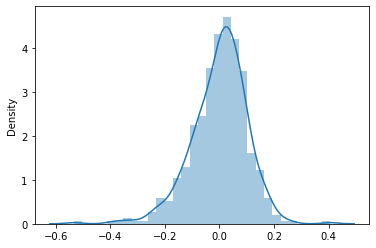

In [588]:
# Histogram for the error terms
res = y_train - y_train_pred
sns.distplot(res)

## Step 8: Making Predictions Using the Final Model


#### Applying the scaling on the test sets

In [589]:
num_vars =  ['temp', 'atemp', 'hum', 'windspeed','cnt']

bike_df_test[num_vars] = scaler.transform(bike_df_test[num_vars])

In [590]:
bike_df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,LightRain
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.146119,0.178082,0.118721,0.100457,0.127854,0.164384,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.354034,0.383458,0.324202,0.301297,0.334692,0.371472,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [591]:
y_test = bike_df_test.pop('cnt')
X_test = bike_df_test

In [592]:
# Adding constant variable to test dataframe
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,LightRain
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
299,1.0,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
152,1.0,0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [593]:
# dropping variables from X_test_sm

X_test_sm = X_test_sm.drop(["March","June","holiday","October","atemp","Thursday","Saturday","August","Wednesday","Tuesday","May","February","hum","Monday","summer","temp","winter","July"], axis = 1)

In [594]:
# Making predictions

y_test_pred = lr_19.predict(X_test_sm)

## Step 9: Model Evaluation


In [595]:
# importing libraries
from sklearn.metrics import r2_score

In [596]:
# computing R-squared
r2_score(y_true=y_test, y_pred=y_test_pred)


0.7757592130422841


Equation of fitted line is:

$ cnt = 0.2464 \times yr + 0.0563 \times workingday-0.2083 \times windspeed-0.2207 \times spring-0.1061 \times December-0.1219 \times January-0.0946 \times November + 0.0730 \times September + 0.0665 \times Sunday-0.0921 \times Cloudy-0.3148 \times LightRain $ 
